# Results

In [1]:
from os import makedirs
from os.path import join

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.ticker import MaxNLocator

plt.rcParams.update({
    'text.latex.preamble': r'\usepackage{cmbright}',
    'text.usetex': True,
    'font.family': 'serif',
})
color = sns.color_palette('deep')

results_dir = '../rpaper'
plots_dir = 'paper_plots'

makedirs(plots_dir, exist_ok=True)

### Arch

In [2]:
# def load_arch_df():
#     df_extra = pd.DataFrame(
#         [
#             ['mobilenetv3-smHM-075', 'MobileNetV3-SmHM',  1.02,  0.12],
#             ['mobilevitv2-050',       'MobileViTv2-0.5',    1.11,  1.05],
#             ['mobilenetv3-large-100', 'MobileNetV3-Large',  4.20,  0.63],
#             ['convnext-atto',         'ConvNeXtV1-Atto',    3.37,  1.62],
#             ['convnextv2-atto',       'ConvNeXtV2-Atto',    3.39,  1.62],
#             ['mobilevitv2-100',       'MobileViTv2-1.0',    4.39,  4.08],

#             ['densenet121',           'Densenet121',        6.95,  8.33],
#             ['mobilevitv2-200',       'MobileViTv2-2.0',   17.42, 16.11],
#             ['convnextv2-nano',       'ConvNeXtV2-Nano',   14.98,  7.21],
#             ['densenet161',           'Densenet161',       26.47, 22.70],
#             ['convnext-tiny',         'ConvNeXtV1-Tiny',   27.82, 28.60],
#             ['convnextv2-tiny',       'ConvNeXtV2-Tiny',   27.87, 28.60],
#         ],
#         columns=['run', 'Arch', 'Params', 'MACs']
#     ).set_index('run')

#     df = pd.read_csv(join(results_dir, 'arch_batch-size-64', 'exp_mtst.csv'))
#     df = df.iloc[:, :4]
#     df = df.rename(columns={'unseen': 'Unseen', 'seen': 'Seen', 'combined': 'HM'})
#     df['Unseen'] = df['Unseen'].str[:5].astype(float)
#     df['Seen'] = df['Seen'].str[:5].astype(float)
#     df['HM'] = df['HM'].str[:5].astype(float)
#     df = df.set_index('run')

#     df = pd.concat([df_extra, df], axis=1, join='inner')
#     df = df[['Arch', 'Unseen', 'Seen', 'HM', 'Params', 'MACs']]
#     df = df.reset_index(drop=True)
#     return df

# arch_df = load_arch_df()
# arch_df

In [3]:
# def generate_arch_plot(df):
#     fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))

#     _color = color[:len(df)]

#     df.plot.scatter('Params', 'HM',
#                     ax=ax0, c=_color)
#     df.plot.scatter('MACs', 'HM',
#                     ax=ax1, c=_color)

#     for x, y, arch in zip(df['Params'], df['HM'], df['Arch']):
#         ax0.text(x, y, f'{arch}', ha='left', va='bottom')
#     xmin, xmax = ax0.get_xlim()
#     ax0.set_xlim(xmin, xmax + 0.35 * (xmax - xmin))
#     ax0.tick_params(axis='both', which='major', labelsize='small')

#     for x, y, arch in zip(df['MACs'], df['HM'], df['Arch']):
#         ax1.text(x, y, f'{arch}',
#                 ha='left', va='bottom')
#     xmin, xmax = ax1.get_xlim()
#     ax1.set_xlim(xmin, xmax + 0.35 * (xmax - xmin))
#     ax1.tick_params(axis='both', which='major', labelsize='small')

#     ax0.set_xlabel('Params (M)')
#     ax1.set_xlabel('MACs (G)')
#     ax1.set_yticklabels([])
#     ax1.yaxis.label.set_visible(False)

#     # plt.xticks(fontsize='small')
#     # plt.yticks(fontsize='small')

#     plt.tight_layout()
#     plt.savefig(join(plots_dir, "params-macs.pdf"))
#     plt.show()

# generate_arch_plot(arch_df)

### Resolution

### From Generalized FSL to Standard FSL

In [4]:
results_dir = '../../Meta-CXR-dev-run/rpaper'

def load_gfsl_df(

    ):
    df = pd.read_csv(join(results_dir, 'gfsl', 'exp_mtst.csv'))

    df[['n-way', 'n-unseen', 'k-shot']] = df['run'].str.split('_', expand=True)
    df['n-way'] = df['n-way'].str[5:].astype(int)
    df['n-unseen'] = df['n-unseen'].str[7:].astype(int)
    df['k-shot'] = df['k-shot'].str[6:].astype(int)
    df['Unseen'] = df['unseen'].str[:5].astype(float)
    df['Seen'] = df['seen'].str[:5].astype(float)
    df['HM'] = df['hm'].str[:5].astype(float)
    df = df[['n-way', 'n-unseen', 'k-shot', 'Unseen', 'Seen', 'HM']]
    return df

gfsl_df = load_gfsl_df()
with open('gfsl.md', 'w') as f:
    f.write(gfsl_df.to_markdown(index=False) + '\n')
gfsl_df

,n-way,n-unseen,k-shot,Unseen,Seen,HM
0,3,1,1,70.13,78.60,71.36
1,3,1,5,74.50,84.54,76.51
2,3,1,15,80.42,86.31,81.29
3,3,2,1,60.50,81.44,68.13
4,3,2,5,70.67,84.92,76.46
5,3,2,15,76.51,86.24,80.60
6,3,3,1,56.91,NaN,56.91
7,3,3,5,64.96,NaN,64.96
8,3,3,15,71.21,NaN,71.21
9,4,1,1,69.78,78.12,72.08


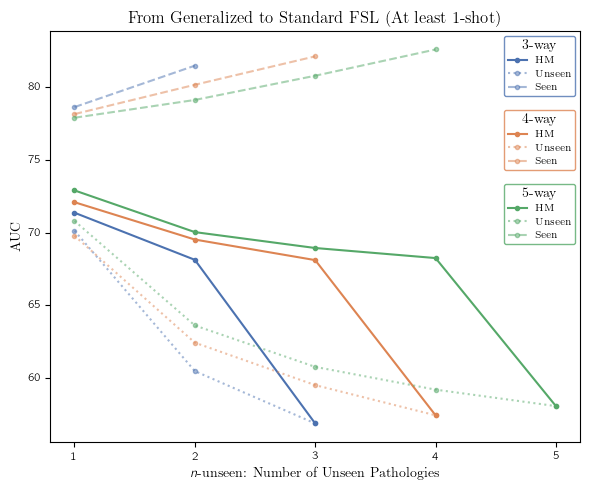

    n-way  n-unseen  Unseen   Seen     HM
0       3         1   70.13  78.60  71.36
3       3         2   60.50  81.44  68.13
6       3         3   56.91    NaN  56.91
9       4         1   69.78  78.12  72.08
12      4         2   62.45  80.13  69.52
15      4         3   59.54  82.08  68.11
18      4         4   57.47    NaN  57.47
21      5         1   70.80  77.87  72.89
24      5         2   63.63  79.09  70.03
27      5         3   60.79  80.75  68.94
30      5         4   59.23  82.55  68.25
33      5         5   58.10    NaN  58.10


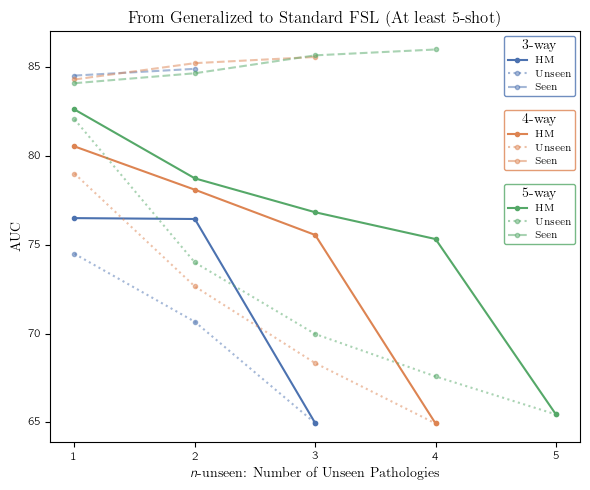

    n-way  n-unseen  Unseen   Seen     HM
1       3         1   74.50  84.54  76.51
4       3         2   70.67  84.92  76.46
7       3         3   64.96    NaN  64.96
10      4         1   79.02  84.32  80.55
13      4         2   72.66  85.24  78.11
16      4         3   68.34  85.59  75.56
19      4         4   64.94    NaN  64.94
22      5         1   82.08  84.11  82.63
25      5         2   74.01  84.67  78.75
28      5         3   69.98  85.68  76.84
31      5         4   67.59  86.01  75.33
34      5         5   65.45    NaN  65.45


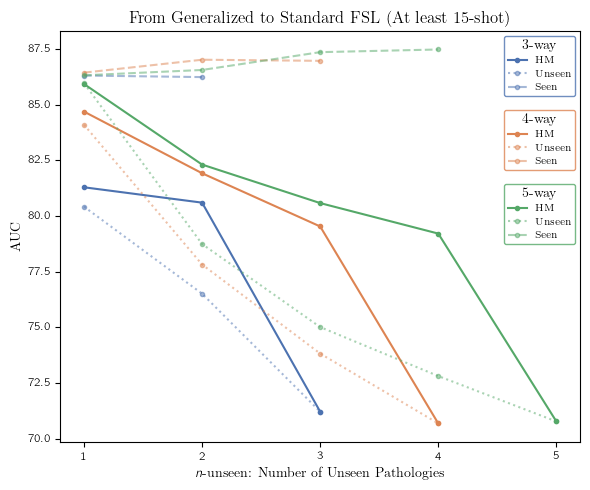

    n-way  n-unseen  Unseen   Seen     HM
2       3         1   80.42  86.31  81.29
5       3         2   76.51  86.24  80.60
8       3         3   71.21    NaN  71.21
11      4         1   84.10  86.44  84.69
14      4         2   77.82  87.02  81.92
17      4         3   73.82  86.97  79.53
20      4         4   70.68    NaN  70.68
23      5         1   85.97  86.32  85.93
26      5         2   78.74  86.56  82.31
29      5         3   75.01  87.36  80.58
32      5         4   72.81  87.48  79.21
35      5         5   70.77    NaN  70.77


In [5]:
def generate_gfsl_df(df, k_shot):
    sns.set_palette('deep')
    fig, ax = plt.subplots(figsize=(6, 5))

    for n_way, c in zip((3, 4, 5), color):
        n_way_label = f'{n_way}-way'
        subdf = df[df['n-way'] == n_way]
        # subdf = subdf.rename(columns={'HM': n_way_label})
        # subdf.plot(x='n-unseen', y=n_way_label,
        #            style='o-', ax=ax, color=c)
        # subdf.plot(x='n-unseen', y='Unseen',
        #            style='s-', ax=ax, color=c, alpha=0.5)
        # subdf.plot(x='n-unseen', y='Seen',
        #            style='D-', ax=ax, color=c, alpha=0.5)

        subdf.plot(x='n-unseen', y='HM',
                   ax=ax,
                   marker='.', linestyle='solid',
                   color=c)
        subdf.plot(x='n-unseen', y='Unseen',
                   ax=ax,
                   marker='.', linestyle='dotted',
                   color=c, alpha=0.5)
        subdf.plot(x='n-unseen', y='Seen',
                   ax=ax,
                   marker='.', linestyle='dashed',
                   color=c, alpha=0.5)

        ax.get_legend().remove()

        from matplotlib.legend import Legend
        leg = Legend(ax, ax.get_lines()[-3:],
                     ['HM', 'Unseen', 'Seen'],
                     title=f'{n_way}-way',
                     fontsize='x-small',
                     edgecolor=c,
                     loc='upper right')
        bb = leg.get_bbox_to_anchor().transformed(ax.transAxes.inverted())
        y_offset = (3 - n_way) * 0.18
        bb.y0 += y_offset
        bb.y1 += y_offset
        leg.set_bbox_to_anchor(bb, transform = ax.transAxes)
        ax.add_artist(leg)

    ax.set_xticks(range(1, 6))
    ax.tick_params(axis='both', which='major', labelsize='small')
    ax.set_xlabel(r'$n$-unseen: Number of Unseen Pathologies')
    ax.set_ylabel('AUC')

    plt.title(f'From Generalized to Standard FSL (At least {k_shot}-shot)')

    plt.tight_layout()
    plt.savefig(join(plots_dir, "gfsl.pdf"))
    plt.show()


for k_shot, k_shot_df in gfsl_df.groupby('k-shot'):
    k_shot_df = k_shot_df.drop(columns=['k-shot'])
    generate_gfsl_df(k_shot_df, k_shot)
    print(k_shot_df)



# for k_shot in gfsl_df['k-shot'].unique():
#     print(k_shot)
    #generate_gfsl_df(gfsl_df)